<a href="https://colab.research.google.com/github/scrambler07/Task_1/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [4]:
df = pd.read_csv("breast-cancer.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

##Feature-matrix, Target-Vector splitting

In [5]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"].map({"M": 1, "B": 0})

##Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##Feature scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##PCA

In [8]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

##Training SVM with Linear Kernel

In [9]:
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train_pca, y_train)

SVC(C=1, kernel='linear')

##Train SVM with RBF Kernel

In [10]:
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale")
svm_rbf.fit(X_train_pca, y_train)

SVC(C=1)

##Decision Boundary Function

In [11]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.tight_layout()
    plt.show()

##Plotting

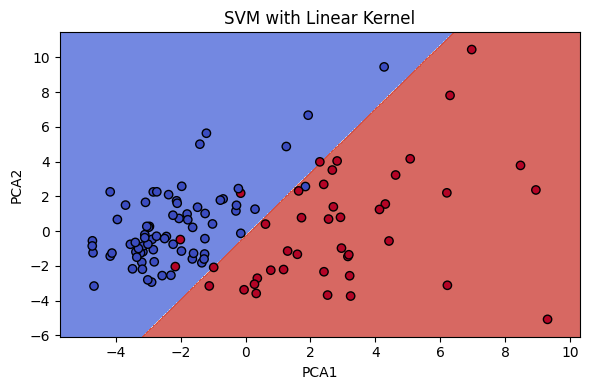

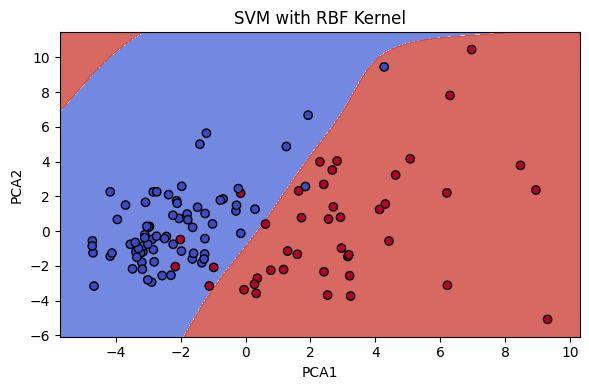

In [12]:
plot_decision_boundary(svm_linear, X_test_pca, y_test, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_test_pca, y_test, "SVM with RBF Kernel")

##Tuning hyperparameters

In [13]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

In [14]:
X_all_pca = np.concatenate((X_train_pca, X_test_pca))
y_all = np.concatenate((y_train, y_test))

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_all_pca, y_all)

print("Best Parameters from Grid Search:", grid.best_params_)

Best Parameters from Grid Search: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


##Cross-validation score of best model

In [16]:
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_all_pca, y_all, cv=5)
print("Cross-Validation Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.95 +/- 0.03
